<a href="https://colab.research.google.com/github/hrutkabence/tutorials/blob/master/english/data_processing/lessons/ml_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Clustering with Machine Learning**

# What is Machine Learning?    
Nowadays, Machine Learning (ML) algorithms are widely used. This technology is behind chatbots, language translation apps, the shows [Netflix](https://research.netflix.com/research-area/machine-learning-platform) suggests to you, and how your social media feeds are presented. This is the basis of the idea of autonomous vehicles and machines too.

Machine Learning (ML) is an Artificial Intelligence (AI) subfield. The basic idea of ML is to teach computers to 'learn' information directly from data with computational methods.             

There are three subcategories of Machine Learning:

![](https://www.wordstream.com/wp-content/uploads/2021/07/machine-learning1-1.png)


In the following, we are going to focus on an unsupervised learning method within that clustering methods.



# **Clustering**

Clustering or cluster analysis is an unsupervised learning problem. There are many types of clustering algorithms. Most of these use similarity or distance measures between points. Some clustering algorithms require specifying or guessing the number of clusters to discover in the data. In contrast, others require the specification of some minimum distance between observations in which examples may be considered “close” or “connected.”

Cluster analysis is an iterative process where subjective evaluation of the identified clusters is fed back into changes to algorithm configuration until a desired or appropriate result is achieved.

**There are several clustering algorithms:**
- Affinity Propagation
- Agglomerative Clustering
- BIRCH
- DBSCAN
- K-Means
- Mini-Batch K-Means
- Mean Shift
- OPTICS
- Spectral Clustering
- Mixture of Gaussians
- etc...

In the following we are going to check on some of these with the help of the **[scikit-learn](https://scikit-learn.org/stable/)** python library.

Scikit-learn is an open-source machine learning library that supports supervised and unsupervised learning. It also provides various tools for model fitting, data preprocessing, model selection, model evaluation, and many other utilities.

**Let's import the modules!**

In [ ]:
# modules
import sklearn
from numpy import where
from sklearn.datasets import make_classification
from matplotlib import pyplot


To test different clustering methods, we need a sample data. In the **scikit-learining** module, there are built-in functions to create it. We will use *make_classification()* to create a dataset of 1000 points with 2 clusters.  

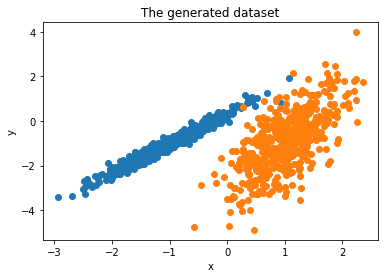

In [ ]:
# define dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)

# create scatter plot for samples from each class
for class_value in range(2):
	# get row indexes for samples with this class
	row_ix = where(y == class_value)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.title('The generated dataset')
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.show()

Now, let's apply the different clustering algorithms on the dataset!

##[k-Means clustering](https://projecteuclid.org/ebooks/berkeley-symposium-on-mathematical-statistics-and-probability/Proceedings%20of%20the%20Fifth%20Berkeley%20Symposium%20on%20Mathematical%20Statistics%20and%20Probability,%20Volume%201:%20Statistics/chapter/Some%20methods%20for%20classification%20and%20analysis%20of%20multivariate%20observations/bsmsp/1200512992)

It may be the most widely known clustering method. While creating the clusters, the algorithm tries to minimize the variance within each group.

To use it, we have to define the *number of clusters*.


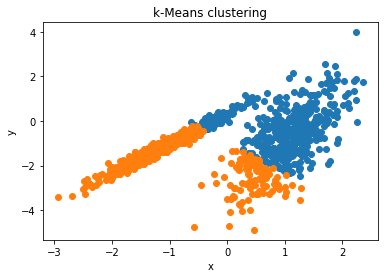

In [ ]:
from sklearn.cluster import KMeans

# define the model
model = KMeans(n_clusters=2)

# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.title('k-Means clustering')
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.show()


An updated version of k-Means, the [Mini-Batch K-Means](https://dl.acm.org/doi/10.1145/1772690.1772862) clustering, uses mini-batches of samples rather than the entire dataset. It makes it faster for large datasets and more robust to statistical noise.

##[Mean shift clustering](https://www.computer.org/csdl/journal/tp/2002/05/i0603/13rRUxYrbVE)

The algorithm finds and adapts centroids based on the density of examples in the feature space.

To apply it, we don't have to define any parameters.

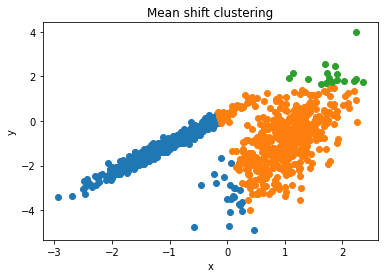

In [ ]:
from sklearn.cluster import MeanShift

# define the model
model = MeanShift()
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.title('Mean shift clustering')
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.show()

##[Affinity propagation](https://www.science.org/doi/10.1126/science.1136800)

The method takes as input measures of similarity between pairs of data points. Real-valued messages are exchanged between data points until a high-quality set of exemplars and corresponding clusters gradually emerges.

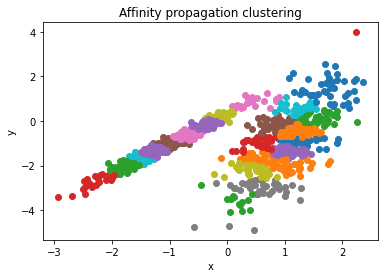

In [ ]:
from sklearn.cluster import AffinityPropagation
from numpy import unique

# define the model
model = AffinityPropagation(damping=0.9)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.title('Affinity propagation clustering')
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.show()


##[Agglomerative clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

It is type of [hierarchical clustering](https://en.wikipedia.org/wiki/Hierarchical_clustering), which is a general family of clustering algorithms that build nested clusters by merging or splitting them successively. This hierarchy of clusters is represented as a tree. The root of the tree is the unique cluster that gathers all the samples, the leaves being the clusters with only one sample.


*Agglomerative clustering* performs
using a bottom-up approach: each observation starts in its own cluster, and clusters are successively merged together. The merging continues until the desired number of clusters is achieved.

The merge strategy contains the following steps:
- minimizes the sum of squared differences within all clusters
- minimizes the maximum distance between observations of pairs of clusters
- minimizes the average of the distances between all observations of pairs of clusters
- minimizes the distance between the closest observations of pairs of clusters

To use *agglomerative clustering*, the *number of clusters* have to be defined.


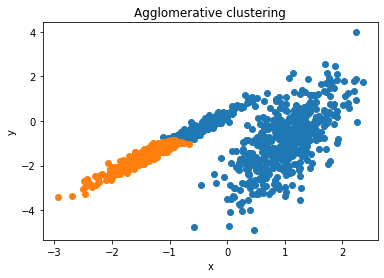

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# define the model
model = AgglomerativeClustering(n_clusters=2)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.title('Agglomerative clustering')
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.show()

##[BIRCH](https://dl.acm.org/doi/10.1145/235968.233324)

BIRCH clustering (Balanced Iterative Reducing and Clustering using
Hierarchies) involves constructing a tree structure from which cluster centroids are extracted.


BRICH incrementally and dynamically clusters incoming multi-dimensional metric data points to produce the best quality clustering with the available resources. This is the first clustering algorithm that handles noise effectively. It is also effective on
large datasets like point clouds.

The *threshold* and *the number of clusters* must be defined to use this method.

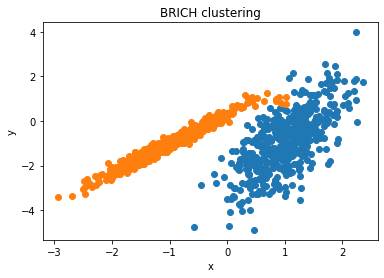

In [ ]:
from sklearn.cluster import Birch

model = Birch(threshold=0.01, n_clusters=2)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.title('BRICH clustering')
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.show()

##[DBSCAN](https://www.osti.gov/biblio/421283)

The main idea of the Density-Based Spatial Clustering of Applications with Noise (DBSCAN) algorithm is to search high-density areas surrounded by low-density ones.

It can be used on large databases with good efficiency. The usage of the DBSCAN is simple, and it requires only two parameters:

•	**eps** – defines the maximum distance (radius) between two neighbors,

•	**n_min** – defines how many surrounding points are necessary to define a core.


How does it work? Let's assume that we have sample data with 'i' elements. Choose a point from it and calculate the distances from the other points. A core point has been found if the number of points in an **eps** range is larger than the predefined **n_min** value. From this core point, other points' distances can be checked, and the size of the core points is expandable until the samples do not meet the requirements. If there are no more core points for a group, a cluster is found, and the search for other clusters can be continued. Points that are not part of any cluster are considered as noise.  

![](https://miro.medium.com/v2/resize:fit:1244/1*86gOGRXVZZaz4tmo5W8VxA.png)

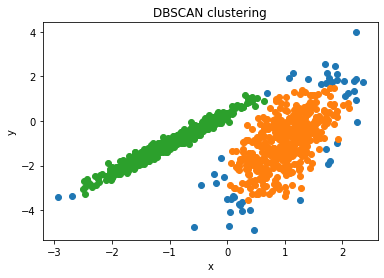

In [ ]:
from sklearn.cluster import DBSCAN
from matplotlib import pyplot

# define the model
model = DBSCAN(eps=0.30, min_samples=9)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.title('DBSCAN clustering')
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.show()

## The main characteristics of the clustering algorithms

![clustering_methods](https://github.com/OSGeoLabBp/tutorials/blob/master/english/data_processing/lessons/images/clustering_methods.png?raw=true)



**Task**
 - Test the different clustering algorithms on a different dataset!
 - Check the [scikit-learn's documentation](https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html) and use other algorithms!

# Applying ML based clustering algorithm on point cloud

The presented clustering method is helpful when we want to separate a group of points in a point cloud.

In most cases, when we would like to apply clustering on a point cloud, the number of clusters is unknown, but as we have seen above, there are several algorithms (like DBSCAN, OPTICS, mean shift) where the number of clusters doesn't have to be defined.     

Therefore, in the following section, we are going to apply the DBSCAN clustering algorithm to separate the roof points of buildings.

**First, let's download the point cloud!**


In [ ]:
!wget -q https://github.com/OSGeoLabBp/tutorials/raw/master/english/data_processing/lessons/code/barnag_roofs.ply

Let's install [Open3D](http://www.open3d.org)!

In [ ]:
!pip install open3d -q

After the installation, import modules and display the point cloud!

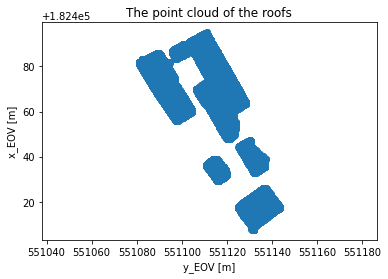

Number of clusters: [-1  0  1  2  3  4  5  6  7  8]


In [ ]:
import open3d as o3d
import numpy as np

from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN
from matplotlib import pyplot

pc = o3d.io.read_point_cloud('barnag_roofs.ply',format='ply')
xyz = np.asarray(pc.points)

# display the point cloud
pyplot.scatter(xyz[:, 0], xyz[:, 1])
pyplot.title('The point cloud of the roofs')
pyplot.xlabel('y_EOV [m]')
pyplot.ylabel('x_EOV [m]')
pyplot.axis('equal')
pyplot.show()

'''
3d display                            TODO
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(xyz[:, 0], xyz[:, 1],xyz[:, 2])
ax.view_init(30, 70)
'''
# define the model
model = DBSCAN(eps=0.30, min_samples=100)

# fit model and predict clusters
yhat = model.fit_predict(xyz)
#print(yhat)

# retrieve unique clusters
clusters = unique(yhat)
print('Number of clusters: '+str(clusters))



Let's use the DBSCAN!

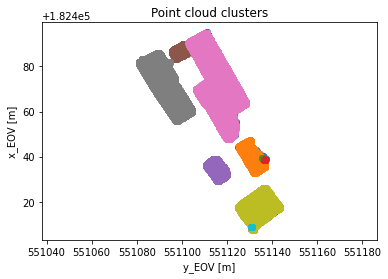

In [ ]:
# Save clusters as
for cluster in clusters:
  # get row indexes for samples with this cluster
  row_ix = where(yhat == cluster)

  # create scatter of these samples
  pyplot.scatter(xyz[row_ix, 0], xyz[row_ix, 1], label=str(cluster)+' cluster')

  # export the clusters as a point cloud
  xyz_cluster = xyz[row_ix]
  pc_cluster = o3d.geometry.PointCloud()
  pc_cluster.points = o3d.utility.Vector3dVector(xyz_cluster)
  if cluster >= 0:
    o3d.io.write_point_cloud('cluster_' + str(cluster) + '.ply', pc_cluster) # export .ply format
  else:
    o3d.io.write_point_cloud('noise.ply', pc_cluster) # export noise

# show the plot
pyplot.title('Point cloud clusters')
pyplot.xlabel('y_EOV [m]')
pyplot.ylabel('x_EOV [m]')
pyplot.axis('equal')
pyplot.show()


**Task for practice**
- Use other clustering algorithms on point clouds!
- Compare the built-in Open3D and scikit-learn DBSCAN algorithm!

#Sources
- https://scikit-learn.org/stable/index.html
- https://machinelearningmastery.com/clustering-algorithms-with-python/
- https://uk.mathworks.com/content/dam/mathworks/ebook/gated/machine-learning-ebook-all-chapters.pdf
- https://mitsloan.mit.edu/ideas-made-to-matter/machine-learning-explained
